# **Used Cars Price Prediction**

Eva Vredenburgh

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
#Data manipulation
import numpy as np
import pandas as pd

#stats
from scipy import stats
from scipy.stats import zscore

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

#MAPE
from sklearn.metrics import mean_absolute_percentage_error

#Scaling the data
from sklearn.preprocessing import MinMaxScaler

#cross validation
from sklearn.model_selection import cross_val_score

#splitting train and test
from sklearn.model_selection import train_test_split

#model build
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

#Heteroskedasticity
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score,precision_score, accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#random forest
from sklearn.ensemble import RandomForestRegressor

#ridge / lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

#save a model
import pickle

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Let us load the data**

In [ ]:
#load
usedcars = pd.read_csv('used_cars.csv')

In [3]:
#make copy to preserve original data
df = usedcars.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
#Review first 5 rows
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [5]:
#review last 5 rows
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [6]:
#how many rows / columns
rows=df.shape[0]
columns=df.shape[1]
print("Rows=",rows,"Columns=",columns)

Rows= 7253 Columns= 14


In [7]:
#review data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [8]:
#look for null values and the data types
df.isnull().sum()

#there are missing values in mileage, engine, power, seats, new_price, and price
#will need to treat missing values (later in the workbook)

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [9]:
#review summary stats
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0


In [10]:
# Checking the number of unique values in each column
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

In [11]:
#review extreme values / outliers
num_df=df.select_dtypes(include='number')
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).sum()

#high number of outliers in columns: Seats, Price, Power, and Kilometers_Driven
#need to look closer at the extreme values - most importantly the ones with high amount of unique values
#seats for example only has 9 possible values

S.No.                   0
Year                   58
Kilometers_Driven     258
Mileage                99
Engine                 65
Power                 273
Seats                1152
New_price             108
Price                 718
dtype: int64

In [12]:
#look at top 5 extreme values for Kilometers_Driven since that feature has the most unique values
df['Kilometers_Driven'].nlargest(n=5)

2328    6500000
340      775000
1860     720000
358      620000
2823     480000
Name: Kilometers_Driven, dtype: int64

In [13]:
#drop value "6,500,000" because this value is way too extreme compared to the others
df.drop(df.loc[df['Kilometers_Driven']==6500000].index, inplace=True)

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

In [14]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


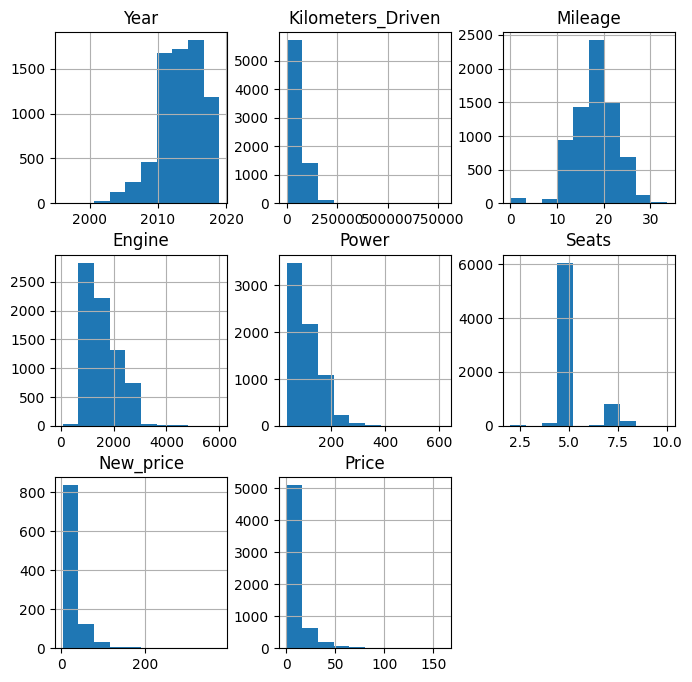

In [15]:
#Distribution of numerical variables
df.hist(["Year","Kilometers_Driven","Mileage","Engine","Power","Seats","New_price","Price"],figsize=(8,8))
plt.show()

#all the distributions are very skewed except Mileage which follows a normal distribution
#Seats has a very high frequency around 4-5 and some outliers around 7
#Years has the highest frequency between 2010-2016
#Price (dependant variable) in particular, is very right skewed
#will need to perform log analysis on Price

In [16]:
#perform log transformation on most skewed distributions
#depedant variable
df["Price_log"] = np.log(df["Price"])
#Kilometers_Driven
df["Kilometers_Driven"] = np.log(df["Kilometers_Driven"])

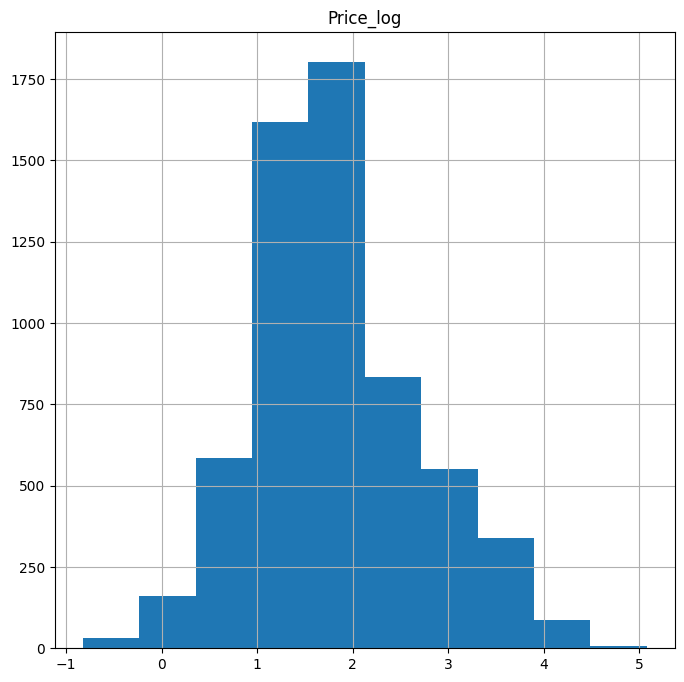

In [17]:
#Look at new distribution of log price
df.hist(["Price_log"],figsize=(8,8))
plt.show()
#the skewness is improved

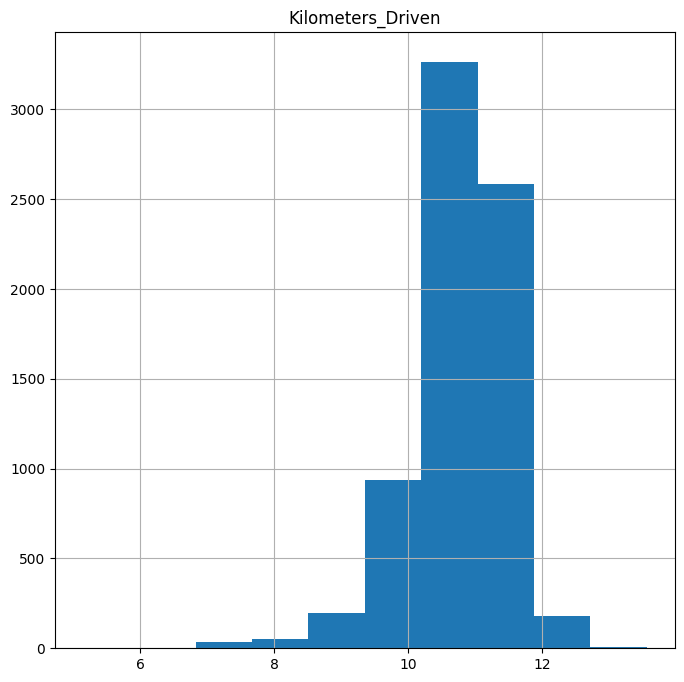

In [18]:
#Look at new distribution of kilometers
df.hist(["Kilometers_Driven"],figsize=(8,8))
plt.show()
#the skewness is improved

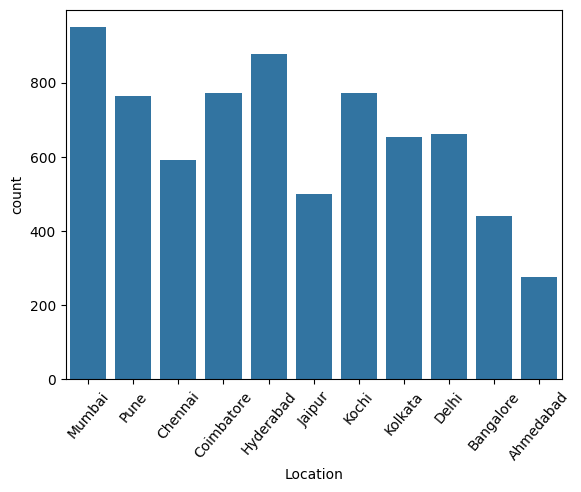

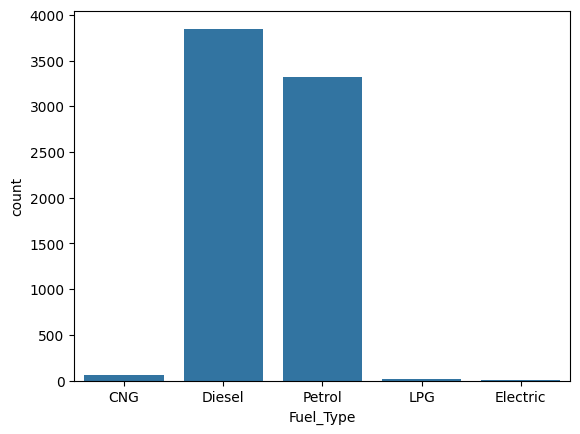

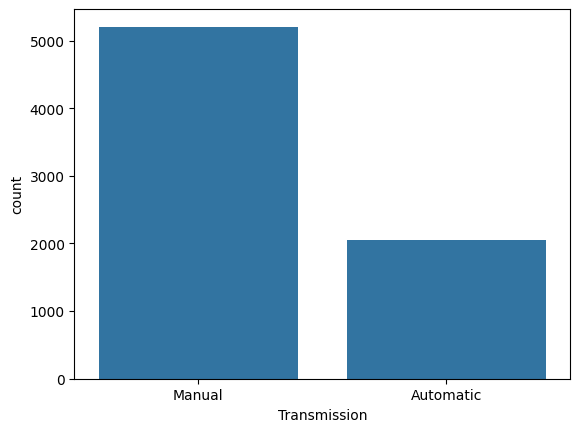

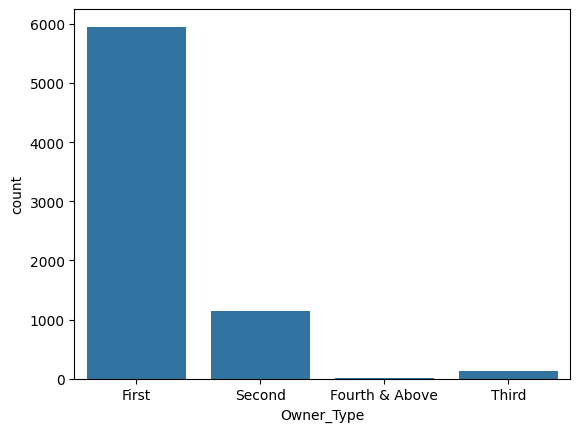

In [19]:
#categorical variables

sns.countplot(data=df,x="Location") #the location Mumbai has the highest frequency and Ahmedabad has the lowest frequency in the dataset
plt.xticks(rotation=50)
plt.show()

sns.countplot(data=df,x="Fuel_Type") #the fuel types are primarily Deisel and Petrol; very few cars with CNG, LPG and Electric
plt.show()

sns.countplot(data=df,x="Transmission") #over 2 times the number of cars are manual than automatic
plt.show()

sns.countplot(data=df,x="Owner_Type") #the first time car owners significantly outnumbers the second, third, and fourth+ owners
plt.show()

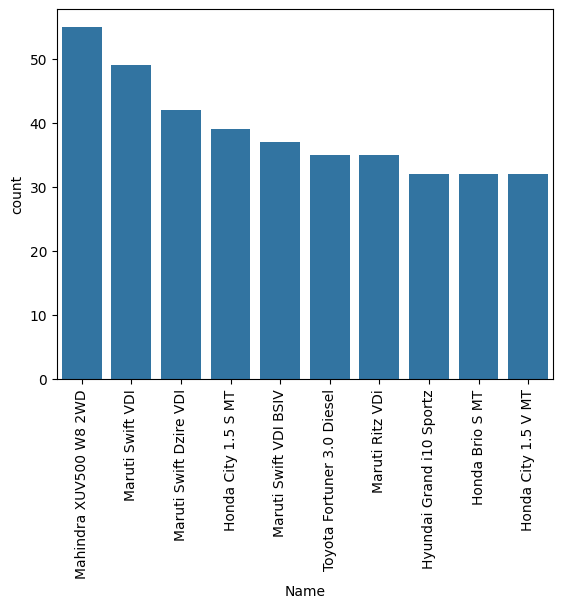

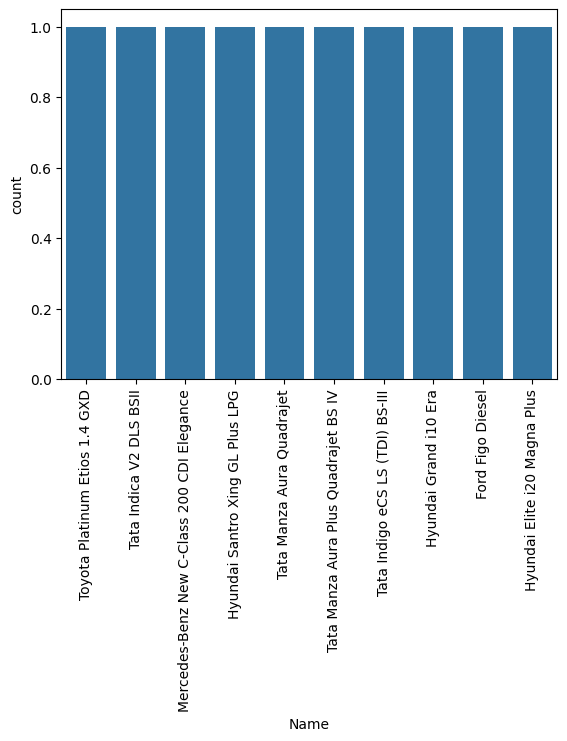

In [20]:
#"name" has too many unique values so the standard count plot as shown above would not be very readable / useful
#instead look at just the top / bottom counts

#top 10 most frequent names
sns.countplot(data=df,x="Name",order=pd.value_counts(df['Name']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()
#the highest frequency name is "Mahindra XUV500 W8 2WD" (frequency over 50)

#bottom 10 names
sns.countplot(data=df,x="Name",order=pd.value_counts(df['Name']).iloc[-10:].index)
plt.xticks(rotation=90)
plt.show()
#the bottom 10 names only have a count of 1 making these unique values

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

In [21]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Price_log
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,11.184421,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,0.559616
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,10.621327,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,2.525729
2,2,Honda Jazz V,Chennai,2011,10.736397,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077
3,3,Maruti Ertiga VDI,Chennai,2012,11.373663,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,1.791759
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,10.613246,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,2.875822


<Axes: >

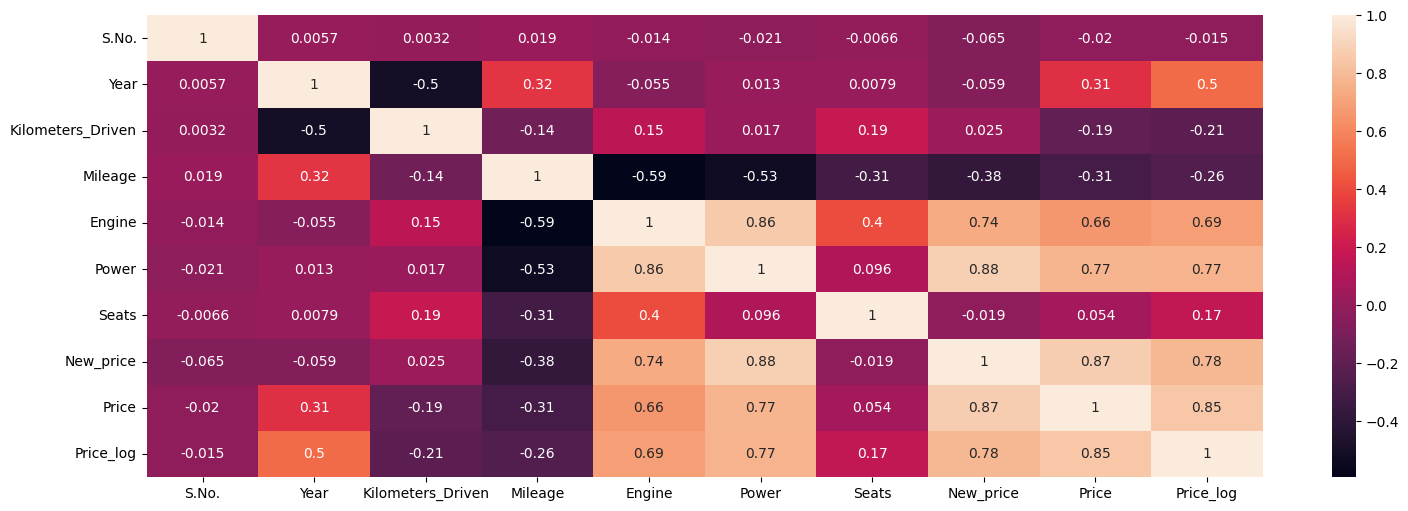

In [22]:
#heatmap
fig = plt.figure(figsize = (18, 6)) #set dimensions for the heatmap size on the screen
sns.heatmap(df.corr(numeric_only = True), annot = True) #plot the heatmap

#Power and new price are most positively correlated
#Mileage and Engine are most negatively correlated
#Other notables correlations are power and engine, new price and engine, power and price, power and mileage, and new price and price

<Axes: xlabel='Engine', ylabel='Price'>

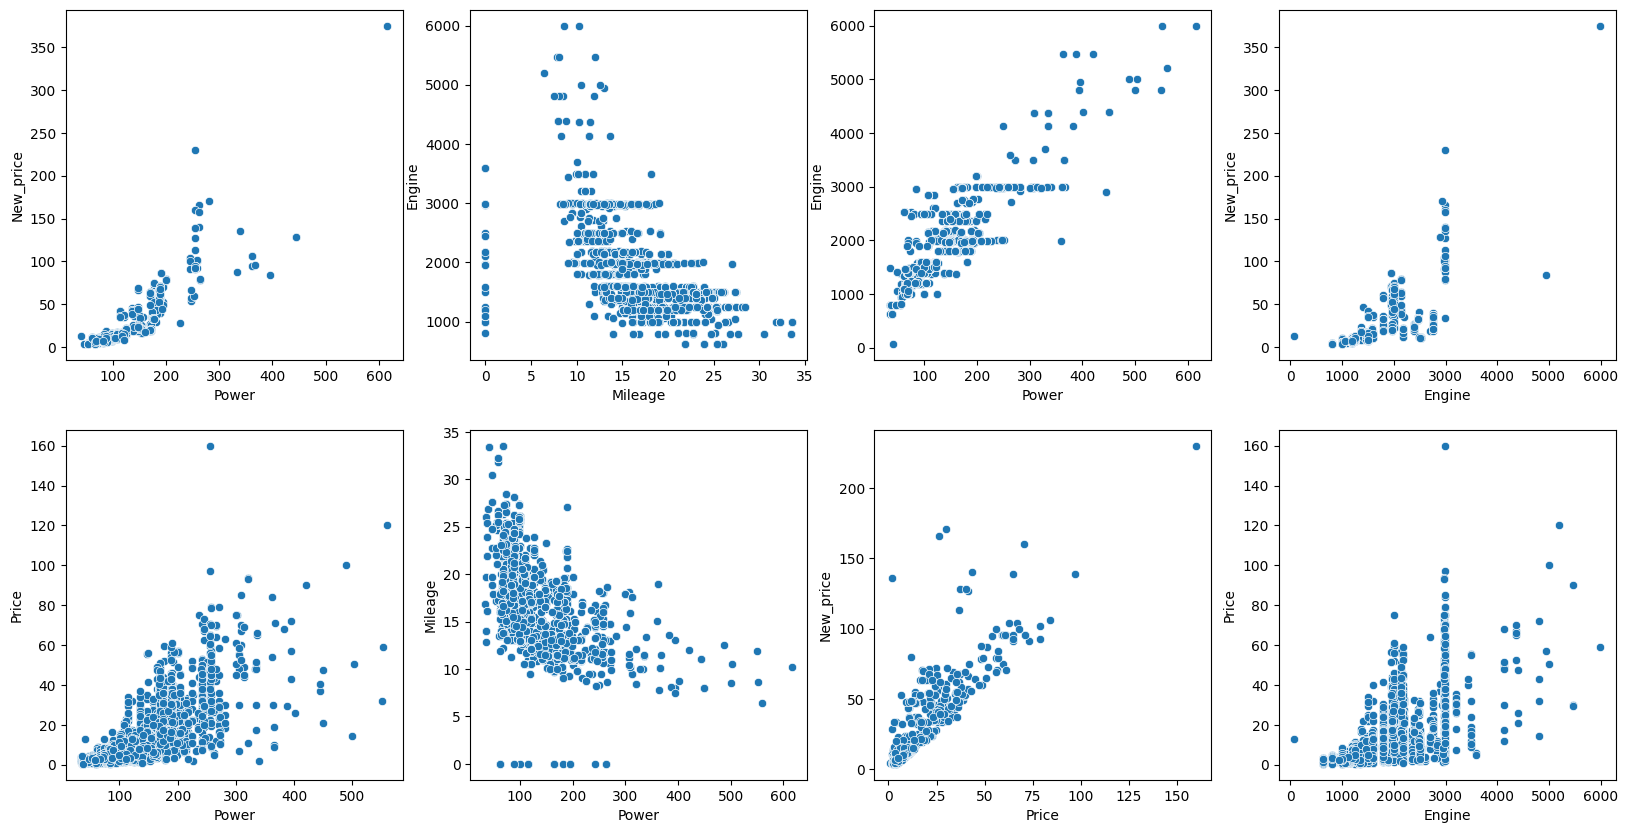

In [23]:
#scatter plots based on notable correlations mentioned above - including log transformed price and new price
fig, axes = plt.subplots(2, 4, figsize = (20, 10))
sns.scatterplot(df,x='Power',y='New_price',ax = axes[0,0])
sns.scatterplot(df,x='Mileage',y='Engine',ax = axes[0,1])
sns.scatterplot(df,x='Power',y='Engine',ax = axes[0,2])
sns.scatterplot(df,x='Engine',y='New_price',ax = axes[0,3])
sns.scatterplot(df,x='Power',y='Price',ax = axes[1,0])
sns.scatterplot(df,x='Power',y='Mileage',ax = axes[1,1])
sns.scatterplot(df,x='Price',y='New_price',ax = axes[1,2])
sns.scatterplot(df,x='Engine',y='Price',ax = axes[1,3])

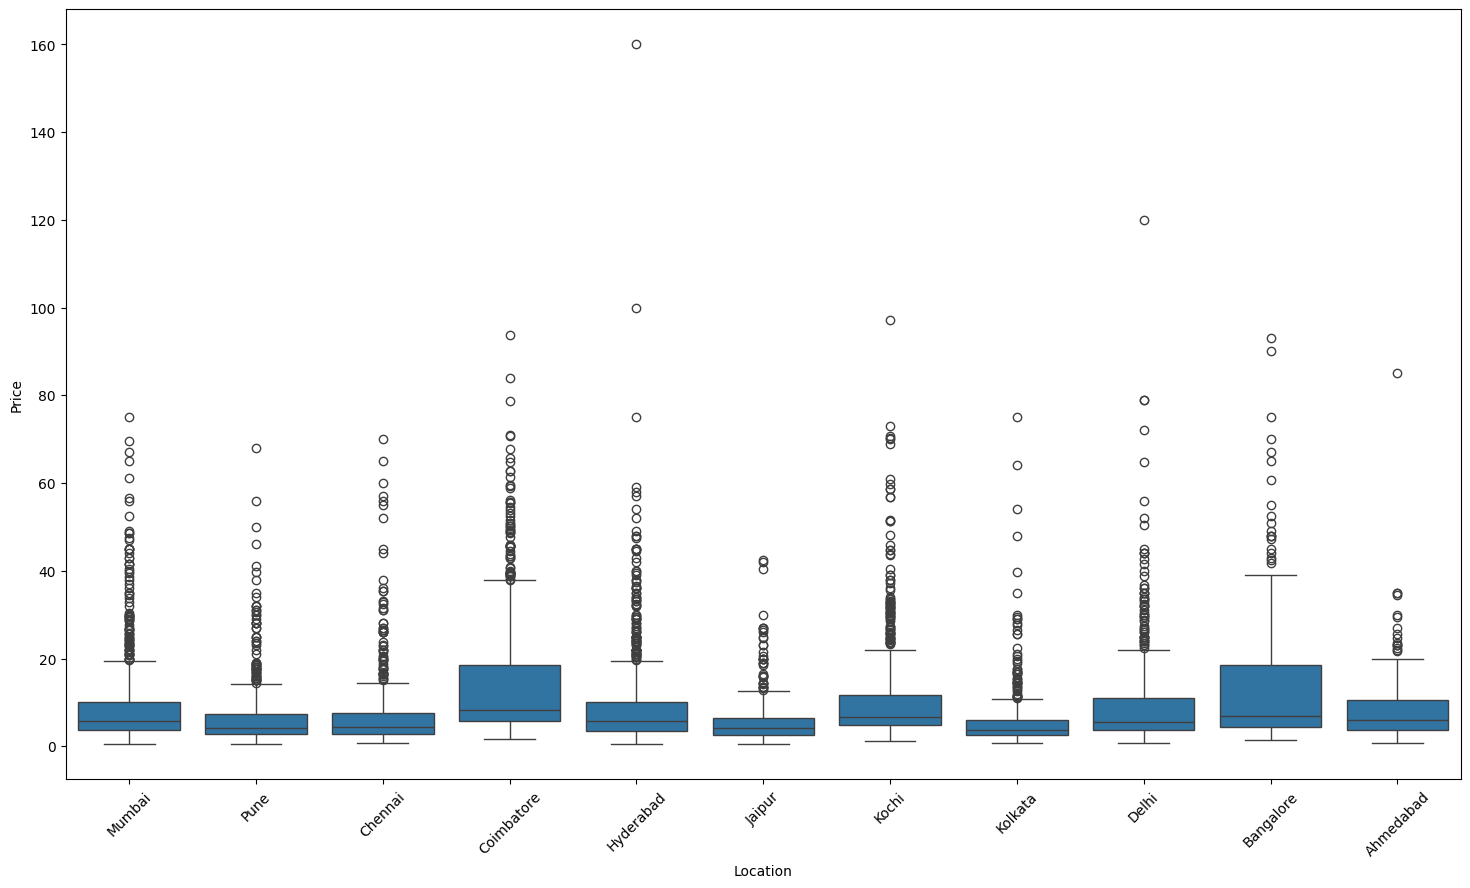

In [24]:
#boxplot for Price and Location
fig = plt.figure(figsize = (18, 10)) #set the size
sns.boxplot(df,x="Location",y="Price")
plt.xticks(rotation = 45); #rotate labels

#all the boxplots are very right skewed
#certain locations appear to have more outliers than others. Like Mumbai has many outliers and so does Hyderabad
#Coimbatore and Bangalore have the largest IQR which means those locations have a higher spread than the others
#Kolkata appears to have the lowest IQR
#the minimum price for all locations appears to be very similar

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [25]:
#feature engineering on 'Name' column
#extract the brand name from this column which happends to be the first word in the string

#split the string into 2 columns
df[['Car_Brand', 'Other']] = df['Name'].str.split(' ', n=1, expand=True)
df['Car_Brand'] = df['Car_Brand'].str.upper()
#drop the other text not needed for the model
df = df.drop('Other', axis=1)

In [26]:
#encode Transmission variables
#Automatic = 1
#Manual = 0
df['Transmission_encoded'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})
#drop categorical Transmission field
df = df.drop('Transmission', axis=1)

In [27]:
#make Owner_Type numeric
df['Owner_Type_encoded'] = df['Owner_Type'].map({'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4})
#drop categorical Owner_Type field
df = df.drop('Owner_Type', axis=1)

In [28]:
#drop serial number (which is unique key) and not needed for modeling
df = df.drop('S.No.', axis=1)

### **Missing value treatment**

In [29]:
#start with price
#drop rows with missing values since price is the dependant variable
df = df[df['Price'].notna()]

In [30]:
#fill in missing values for other fields: mileage, engine, power, seats
#can use mean, median or mode but here I will use median to populate the null values

df['Mileage']=df['Mileage'].fillna(df['Mileage'].median())
df['Engine']=df['Engine'].fillna(df['Engine'].median())
df['Power']=df['Power'].fillna(df['Power'].median())
df['Seats']=df['Seats'].fillna(df['Seats'].median())

In [31]:
#next, treat missing values for New_price
#find the largest and smallest values for new price (not including extreme values) to get the parameters for the pattern recognition

df_newprice = df[df['New_price'].notna()]
median = np.median(df_newprice['New_price'])
upper_quartile = np.percentile(df_newprice['New_price'], 75)
lower_quartile = np.percentile(df_newprice['New_price'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = df_newprice['New_price'][df_newprice['New_price']<=upper_quartile+1.5*iqr].max()
lower_whisker = df_newprice['New_price'][df_newprice['New_price']>=lower_quartile-1.5*iqr].min()

print(upper_whisker)
print(lower_whisker)

54.43
3.91


In [32]:
#will use 3.9 and 54.4 (found in previous step) as the parameters for missing value treatment for this field
#using pattern recognition to treat missing values for New Price

NewPrice_to_be_updated = df[df['New_price'].isnull()].index
df.loc[NewPrice_to_be_updated, 'New_price'] = np.random.uniform(3.9, 54.4, len(NewPrice_to_be_updated)) #assuming uniform

In [33]:
#now check for NAs again to make sure all are treated
df.isnull().sum()
#missing value treatment was successful

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_price               0
Price                   0
Price_log               0
Car_Brand               0
Transmission_encoded    0
Owner_Type_encoded      0
dtype: int64

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [34]:
#first encode brand name
brand_avg_price = df.groupby('Car_Brand')['Price_log'].mean() #calculate the mean price for every car brand
df['Car_Brand_encoded'] = df['Car_Brand'].map(brand_avg_price) #map it into the Car_Brand_encoded field
#drop not encoded brand name
df = df.drop(['Car_Brand'], axis = 1)

In [35]:
#same with Location
brand_avg_price = df.groupby('Location')['Price_log'].mean()
df['Location_encoded'] = df['Location'].map(brand_avg_price)
#drop not encoded location
df = df.drop(['Location'], axis = 1)

In [36]:
#same with Fuel type
brand_avg_price = df.groupby('Fuel_Type')['Price_log'].mean()
df['Fuel_Type_encoded'] = df['Fuel_Type'].map(brand_avg_price)
#drop not encoded fuel type
df = df.drop(['Fuel_Type'], axis = 1)

In [37]:
df.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,Price_log,Transmission_encoded,Owner_Type_encoded,Car_Brand_encoded,Location_encoded,Fuel_Type_encoded
0,Maruti Wagon R LXI CNG,2010,11.184421,26.60,998.0,58.16,5.0,41.893751,1.75,0.559616,0,1,1.357329,1.870421,1.186583
1,Hyundai Creta 1.6 CRDi SX Option,2015,10.621327,19.67,1582.0,126.20,5.0,21.778071,12.50,2.525729,0,1,1.500406,1.513186,2.179602
2,Honda Jazz V,2011,10.736397,18.20,1199.0,88.70,5.0,8.610000,4.50,1.504077,0,1,1.580557,1.609097,1.426548
3,Maruti Ertiga VDI,2012,11.373663,20.77,1248.0,88.76,7.0,25.838291,6.00,1.791759,0,1,1.357329,1.609097,2.179602
4,Audi A4 New 2.0 TDI Multitronic,2013,10.613246,15.20,1968.0,140.80,5.0,16.035434,17.74,2.875822,1,2,3.129508,2.333402,2.179602


In [38]:
#drop name, price, log price
#dont need name field since the car brand name was already extracted and encoded
#dont want price or log price in the features (or X) dataset since that is the dependant / target variable 
features = df.drop(['Name','Price','Price_log'], axis = 1)
target = df[["Price_log", "Price"]]

In [39]:
#split data into train and test
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.3, random_state = 42) #test size is 30% of the total dataset and 42 is a standard value for random state

In [40]:
#need to scale because not all features follow a normal distribution
#Fit the scaler on training data only
scaler = MinMaxScaler()
train_features_scaled = scaler.fit_transform(train_features)
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns) #convert scaler array back into a dataframe

#Use the same scaler on the test data (do not re-fit or this would cause data leakage between test and train)
test_features_scaled = scaler.transform(test_features)
test_features_scaled = pd.DataFrame(test_features_scaled, index = test_features.index, columns = test_features.columns) #convert scaler array back into a dataframe


For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [41]:
#1. build model using linear regression

#convert to float or OLS model will not run
train_features_scaled2 = train_features_scaled.astype(float)
train_target2 = train_target.astype(float)

#add constant
train_features_scaled2 = sm.add_constant(train_features_scaled2)

#use OLS algorithm on the train features and the target variable
#this is where coeff are calculated
model1 = sm.OLS(train_target2["Price_log"], train_features_scaled2)

#fit the model
res1 = model1.fit()

#show regression results
print(res1.summary())

#R squared is .904 which is very high (close to 1). Higher the R squared, the better the model fit
#P>|t shows the varaibles important to prediction or not (using p value)
#we want all the p values to be under 5% so need to start removing features to achieve that. This will result in 95% confidence

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     3302.
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:18:22   Log-Likelihood:                -453.84
No. Observations:                4212   AIC:                             933.7
Df Residuals:                    4199   BIC:                             1016.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1703 

In [42]:
#review all features with a p value greater than .05
OLSmodel = pd.DataFrame(res1.params, columns = ['coef'])
OLSmodel['pval'] = res1.pvalues
pval_filter = OLSmodel['pval']>= 0.05
OLSmodel[pval_filter]

#the only p value over .05 is new price so need to drop that feature

,coef,pval
New_price,0.007959,0.852711


In [43]:
#drop new price
train_features_scaled3 = train_features_scaled2.drop(["New_price"], axis = 1)

#train second model
model2 = sm.OLS(train_target2["Price_log"], train_features_scaled3)
res2 = model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     3603.
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:18:23   Log-Likelihood:                -453.85
No. Observations:                4212   AIC:                             931.7
Df Residuals:                    4200   BIC:                             1008.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1691 

In [44]:
#check the vif scores
vif = pd.Series(
    [variance_inflation_factor(train_features_scaled3.values, i) for i in range(train_features_scaled3.shape[1])],
    index = train_features_scaled3.columns,
    dtype = float)

print(vif)

#need to drop engine next since that has the highest vif score (over 5 is considered high)

const                   188.756024
Year                      2.002627
Kilometers_Driven         1.630193
Mileage                   2.531758
Engine                    7.814120
Power                     6.710816
Seats                     1.883494
Transmission_encoded      2.017131
Owner_Type_encoded        1.185217
Car_Brand_encoded         2.988357
Location_encoded          1.127999
Fuel_Type_encoded         1.969592
dtype: float64


In [45]:
#drop engine
train_features_scaled4 = train_features_scaled3.drop(["Engine"], axis = 1)

#train third model
model3 = sm.OLS(train_target2["Price_log"], train_features_scaled4)
res3 = model3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     3913.
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:18:23   Log-Likelihood:                -478.63
No. Observations:                4212   AIC:                             979.3
Df Residuals:                    4201   BIC:                             1049.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0929 

In [46]:
#recalculate vif scores
vif = pd.Series(
    [variance_inflation_factor(train_features_scaled4.values, i) for i in range(train_features_scaled4.shape[1])],
    index = train_features_scaled4.columns,
    dtype = float)

print(vif)

#all vif scores are under 5 which is good
#also, r squared in model3 is high and close to 1 and all the p values are under .05 which means 95% confidence in the model

const                   181.985538
Year                      1.999630
Kilometers_Driven         1.627041
Mileage                   2.267050
Power                     3.069454
Seats                     1.503907
Transmission_encoded      2.008893
Owner_Type_encoded        1.185217
Car_Brand_encoded         2.979323
Location_encoded          1.127848
Fuel_Type_encoded         1.750250
dtype: float64


In [47]:
#review all p values again
OLSmodel2 = pd.DataFrame(res3.params, columns = ['coef'])
OLSmodel2['pval'] = res3.pvalues
pval_filter2 = OLSmodel2['pval']>= 0.05
OLSmodel2[pval_filter2]
#no p values over .05

#for the linear regression model3 is the final version

,coef,pval


In [48]:
#2. build the model using ridge / lasso regression

#Ridge Regression Model
ridgeReg = Ridge(alpha=10) #assuming an alpha of 10 (an alpha of 10 is the default for ridge regression)
ridgeReg.fit(train_features_scaled, train_target["Price_log"]) #fit the model

#show score for ridge regression
train_score_ridge = ridgeReg.score(train_features_scaled, train_target["Price_log"])
print("Ridge Regression score=",train_score_ridge) #high ridge regression score which indicates a strong model

#Lasso Regression Model
lasso = Lasso(alpha = 1) #assuming an al#pha of 1 (can be any number 0+)
lasso.fit(train_features, train_target["Price_log"]) #fit the model
#show score for lasso regression
train_score_ls =lasso.score(train_features, train_target["Price_log"])
print("Lasso Regression score=",train_score_ls) #moderate score for the lasso model (for lasso, higher the alpha higher the penalty on the model)

Ridge Regression score= 0.8986134791140371
Lasso Regression score= 0.6986472968893396


In [49]:
#Ridge model tuning

#Set up the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]} #different values of Alpha to search for the best one

#grid search
grid_search_ridge = GridSearchCV(ridgeReg, param_grid, cv=5, verbose=1)
grid_search_ridge.fit(train_features_scaled, train_target["Price_log"])

#Get the best model
best_ridge = grid_search_ridge.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [50]:
#Lasso model tuning
#Set up the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]} #different values of Alpha to search for the best one

#grid search
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, verbose=1)
grid_search_lasso.fit(train_features_scaled, train_target["Price_log"])

#Get the best model
best_lasso = grid_search_lasso.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Linear Regression, Lasso and Ridge models are built and tuned
Next models to build are Deciscion Tree and Random Forest

In [51]:
#3. build a model using decision tree
d_tree = DecisionTreeRegressor(random_state=1,max_depth=5, min_samples_leaf=10)
d_tree.fit(train_features_scaled, train_target["Price_log"])

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=1)

In [52]:
#4. build model using random forest
r_forest = RandomForestRegressor(n_estimators=100,random_state=42)
r_forest.fit(train_features_scaled, train_target["Price_log"])

RandomForestRegressor(random_state=42)

### **Feature Importance: Decision Tree**

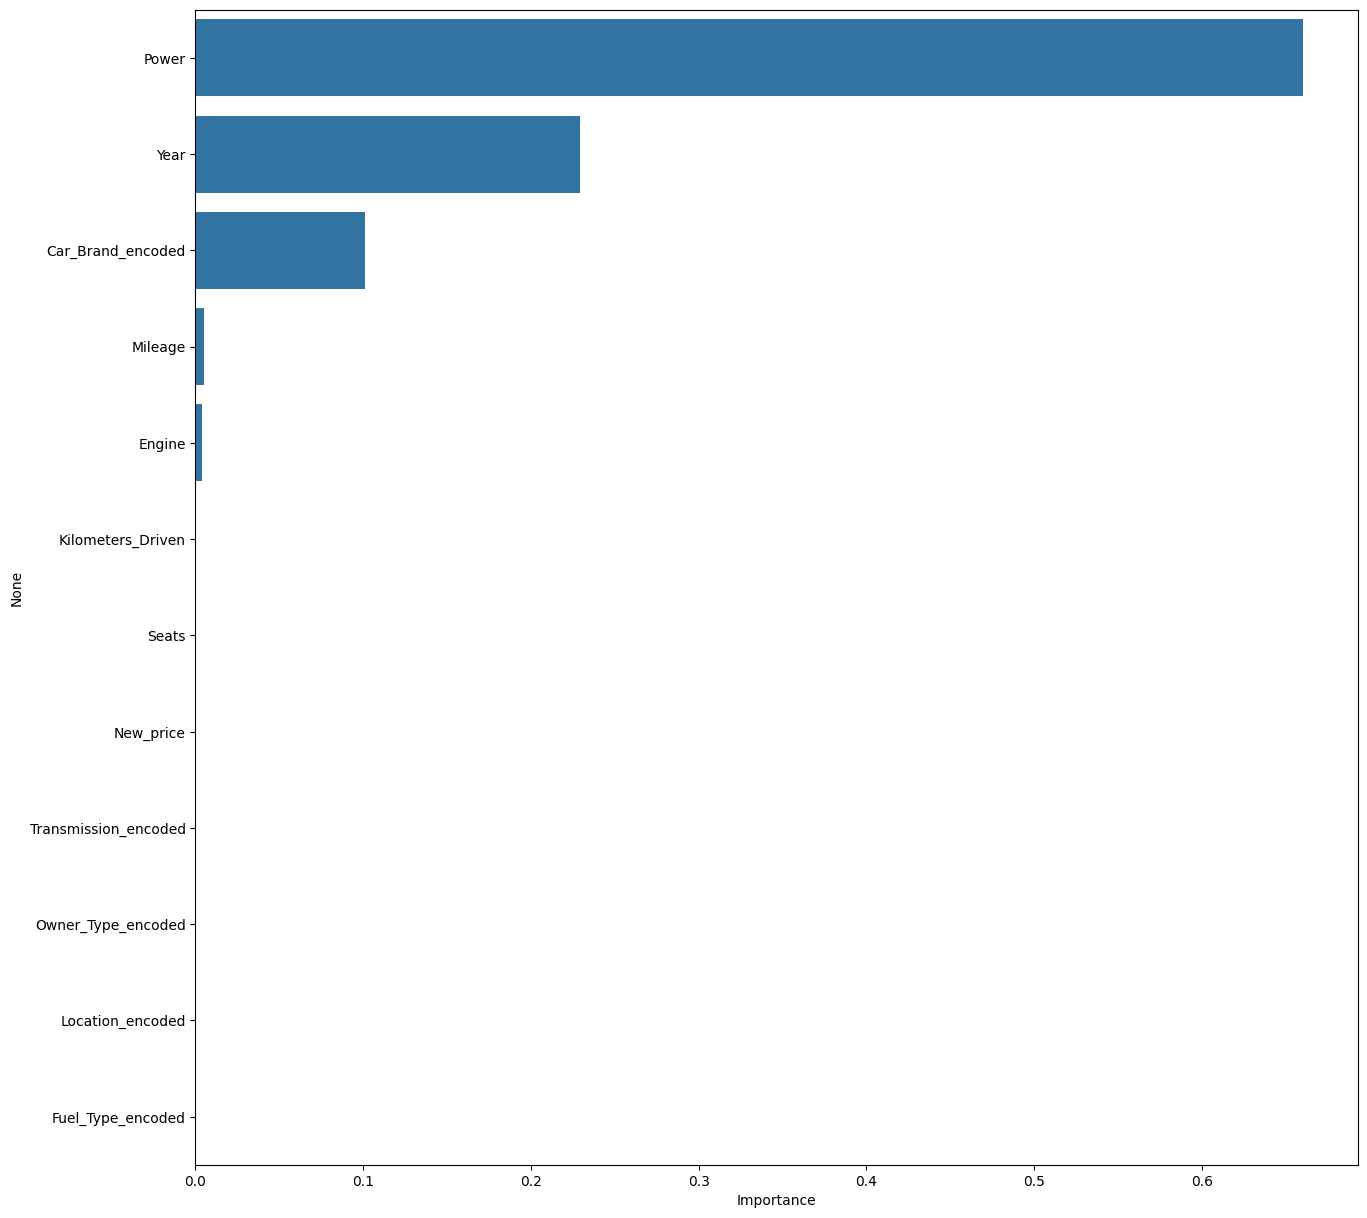

In [53]:
#show feature importance for the deciscion tree previously created

importances = d_tree.feature_importances_
columns = train_features_scaled.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (15, 15))
sns.barplot(x=importance_df.Importance,y=importance_df.index);

#can see some variables that are most important include power, year, and car brand
#at the bottom it can be seen that the model is not using many variables such as fuel type, location, and owner type

### **Hyperparameter Tuning: Decision Tree**

In [54]:
#see current parameters for the decision tree
print(d_tree.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [55]:
#use gridsearch for hyperparameter tuning

#set the parameters for the grid search (different depths, sample slits etc to search to return the best combination)
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

#run grid search
grid_search = GridSearchCV(estimator=d_tree, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error',
                           cv=5, n_jobs=-1, verbose=1)

grid_search.fit(train_features_scaled, train_target["Price_log"])
best_dt = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best MAE (negative):", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best MAE (negative): -0.19927576964215912


### **Feature Importance: Random Forest**

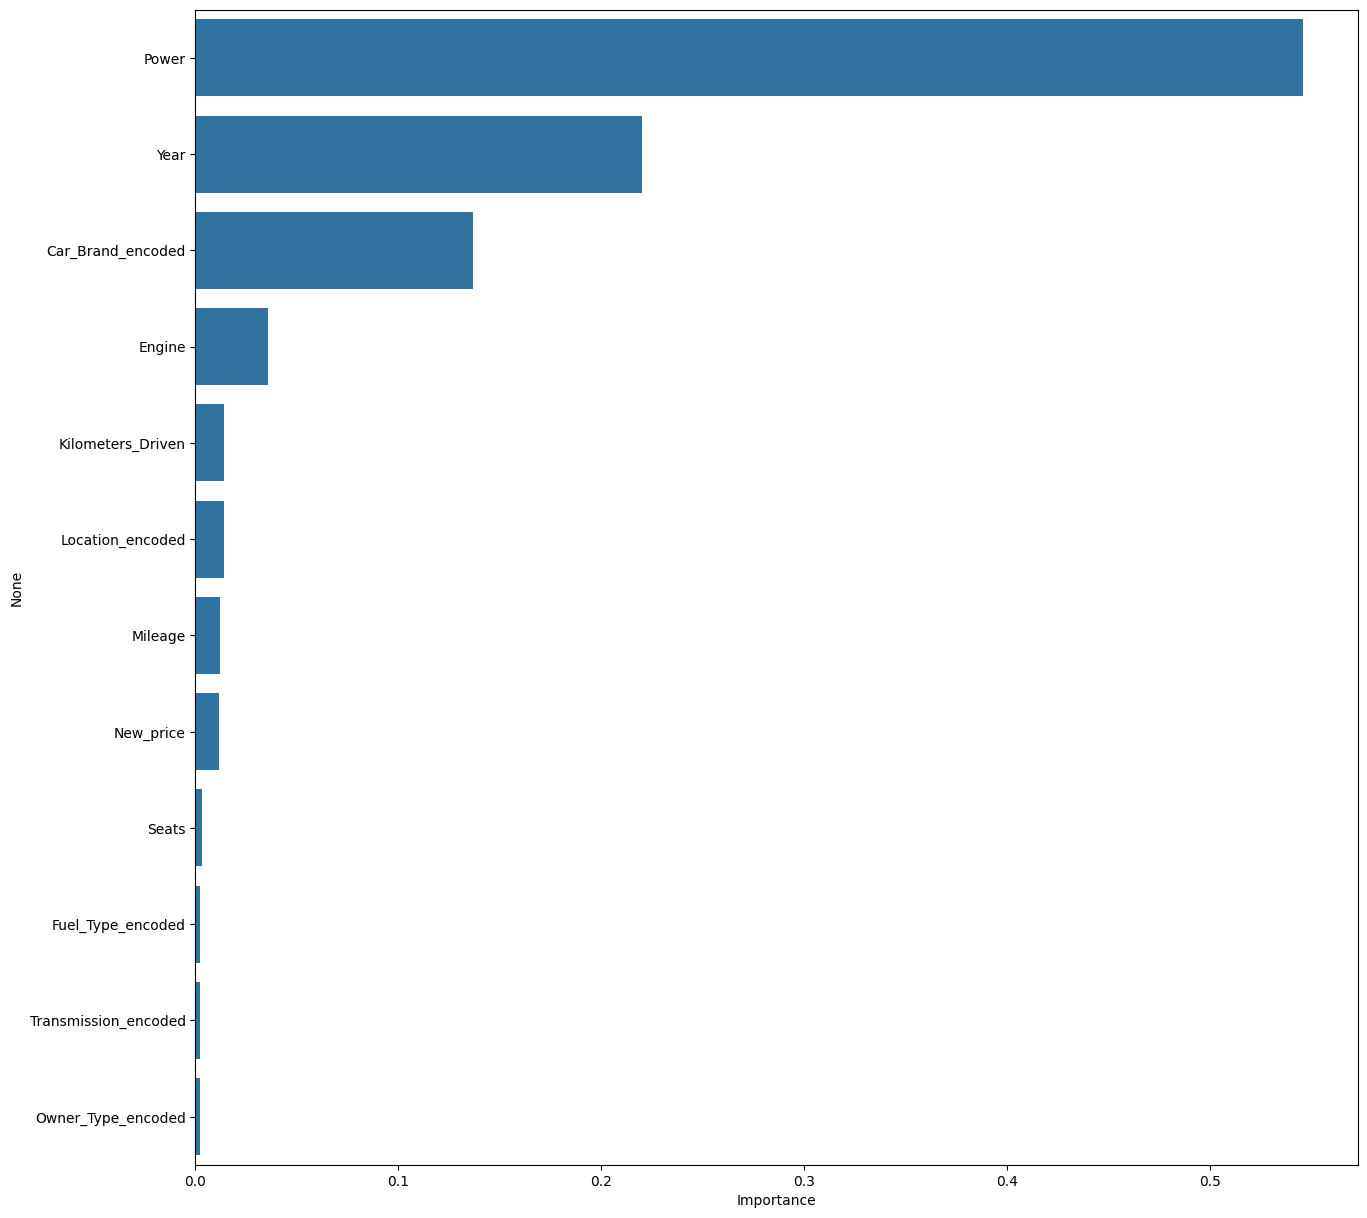

In [56]:
#show feature importance for random forest

importances2 = r_forest.feature_importances_
columns = train_features_scaled.columns
importance_df2 = pd.DataFrame(importances2, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (15, 15))
sns.barplot(x=importance_df2.Importance,y=importance_df2.index);

#result is very similar to the deciscion tree
#most important features include power, year, and car brand however here engine is more important

### **Hyperparameter Tuning: Random Forest**

In [ ]:
##set the parameters
params_rf = {'max_depth': np.arange(2, 10),'criterion': ['squared_error']}

#run grid search
grid_obj = GridSearchCV(r_forest, params_rf, scoring = "neg_mean_squared_error", cv = 5)
grid_obj = grid_obj.fit(train_features_scaled, train_target["Price_log"])

#set best combination of parameters
best_rf = grid_obj.best_estimator_

In [58]:
#now that all the models have been built, will make predictions on the test data

#1. linear regression
#drop same features from training data that was previously done in test data
test_features2 = test_features_scaled.drop(["Engine","New_price"], axis = 1)
#add a constant
test_features_new_w_const = sm.add_constant(test_features2)
#test predictions on the test dataset
test_predictions = res3.predict(test_features_new_w_const)
lr_inverse = np.exp(test_predictions)  #Inverse log transformation because performance metrics need to be on the original price scale

#2. ridge
prediction_ridge = best_ridge.predict(test_features_scaled)
prediction_ridge_inverse = np.exp(prediction_ridge)  #Inverse log transformation

#3. lasso
prediction_lasso = best_lasso.predict(test_features_scaled)
prediction_lasso_inverse = np.exp(prediction_lasso)  #Inverse log transformation

#4. decision tree
prediction_dt2 = best_dt.predict(test_features_scaled)
prediction_dt2_inverse = np.exp(prediction_dt2)  #Inverse log transformation

#5. random forest
prediction_rf2 = best_rf.predict(test_features_scaled)
prediction_rf2_inverse = np.exp(prediction_rf2)  #Inverse log transformation


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [59]:
#compare performance metrics

#calculate the MAE for all the models created
print("linear regression MAE=",mean_absolute_error(test_target['Price'], lr_inverse)) #pretty low error
print("ridge regression MAE=",mean_absolute_error(test_target['Price'], prediction_ridge_inverse)) #pretty low error
print("lasso regression MAE=",mean_absolute_error(test_target['Price'], prediction_lasso_inverse)) #highest error of all
print("decision tree regression MAE=",mean_absolute_error(test_target['Price'], prediction_dt2_inverse)) #pretty low error
print("random forest regression MAE=",mean_absolute_error(test_target['Price'], prediction_rf2_inverse)) #lowest error of all

#calculating the r squared for all the models created
print("linear regression r2=",r2_score(test_target['Price'], lr_inverse)) #strong model
print("ridge regression r2=",r2_score(test_target['Price'], prediction_ridge_inverse)) #also strong model
print("lasso regression r2=",r2_score(test_target['Price'], prediction_lasso_inverse)) #worst performing model by far; likely not using enough features / too much regularization
print("decision tree regression r2=",r2_score(test_target['Price'], prediction_dt2_inverse)) #Good but less stable compared to linear, ridge and rf
print("random forest regression r2=",r2_score(test_target['Price'], prediction_rf2_inverse)) #best model explains ~82% of variance

linear regression MAE= 2.0379900175286143
ridge regression MAE= 2.0307368781435495
lasso regression MAE= 5.37812168325055
decision tree regression MAE= 2.074457516422982
random forest regression MAE= 1.68234780086929
linear regression r2= 0.8067836022693706
ridge regression r2= 0.802204953009195
lasso regression r2= 0.12484893658567442
decision tree regression r2= 0.768143551874771
random forest regression r2= 0.8149720270889707


In [60]:
mean_price=df.loc[:, 'Price'].mean()
print(mean_price)

9.470242605516782


In [61]:
#look at the relative error

relative_mae_LR = ((mean_absolute_error(test_target['Price'], lr_inverse))) / mean_price
print("linear regression relative error",relative_mae_LR) #on average the models predicted price is off by about 22% from the true price
relative_mae_ridge = ((mean_absolute_error(test_target['Price'], prediction_ridge_inverse))) / mean_price
print("ridge regression relative error",relative_mae_ridge) #on average the models predicted price is off by about 21% from the true price
relative_mae_lasso = ((mean_absolute_error(test_target['Price'], prediction_lasso_inverse))) / mean_price
print("lasso regression relative error",relative_mae_lasso) #on average the models predicted price is off by about 57% from the true price
relative_mae_dt = ((mean_absolute_error(test_target['Price'], prediction_dt2_inverse))) / mean_price
print("deciscion tree relative error",relative_mae_dt) #on average the models predicted price is off by about 21% from the true price
relative_mae_rf = ((mean_absolute_error(test_target['Price'], prediction_rf2_inverse))) / mean_price
print("random forest relative error",relative_mae_rf) #on average the models predicted price is off by about 18% from the true price


linear regression relative error 0.2151993462492087
ridge regression relative error 0.21443345885992052
lasso regression relative error 0.5678969280171963
deciscion tree relative error 0.21905009225577074
random forest relative error 0.17764569197934352


In [62]:
#Save the models created using pickle
with open('LinearRegression.pkl','wb') as f:
    pickle.dump(model3,f)

with open('Ridge.pkl','wb') as f:
    pickle.dump(best_ridge,f)

with open('Lasso.pkl','wb') as f:
    pickle.dump(best_lasso,f)

with open('dt.pkl','wb') as f:
    pickle.dump(best_dt,f)

with open('rf.pkl','wb') as f:
    pickle.dump(best_rf,f)

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

In [63]:
#its important for the business to make informed decisions about how to price used cars which is a challenge since so many factors can influence the price
#the most meaningful insights from these models developed is that:
#1) power, year and car brand are the most important features influencing price as seen in the decision tree and random forest
#2) the linear regression model had 2 features that needed to be removed to improve model performance indicating that Engine and New Price had high collinearity
#3) the dependant variable which was being predicted (price) did not follow a normal distribution so it needed to be log transformed
#4) Brand name which is an important feature needed a decent amount of engineering since in its original state it was a string of many characters resulting in many unique values
#5) the final performance metrics indicate the model tuning helped improve model performance

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

In [64]:
#i would propose the random forest model be adopted since the performance metrics were best compared to the other models
#the random forest had the lowest error and explains most variance
#on average the models predicted price is off by about 18% from the true price which is a pretty solid predictive model
#however, the linear and ridge regression models are also strong models which could be applied but the random forset performs the best
#the lasso likely is over regularized and in its current state i would not recommend that model to be used